# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ivan Sholana
- **Email:** ivansholana@gmail.com
- **ID Dicoding:** Ivan Sholana

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara tingkat polusi udara (terutama PM2.5 dan PM10) dengan variabel lingkungan lainnya seperti suhu udara, tekanan udara, dan kelembaban udara.

- Bagaimana pola polusi udara berubah dari waktu ke waktu di berbagai stasiun pengukuran? Apakah ada tren peningkatan atau penurunan polusi udara dari tahun ke tahun di stasiun-stasiun tersebut? Pertanyaan ini mengarah pada analisis pola dan tren dari data polusi udara dalam rentang waktu tertentu di berbagai stasiun pengukuran, yang dapat memberikan wawasan mengenai perkembangan polusi udara dan memberikan dasar bagi tindakan yang relevan dalam pengelolaan lingkungan.

## Import Semua Packages/Library yang Digunakan

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [34]:
dataset_path = "dataset/Air-quality-dataset"
csv_files = [file for file in os.listdir(dataset_path) if file.endswith('.csv')]

all_data = []

for file in csv_files:
    df = pd.read_csv(os.path.join(dataset_path,file))
    all_data.append(df)
    
air_quality = pd.concat(all_data,ignore_index=True)
    

In [35]:
air_quality.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## Tabel Data Kualitas Udara

| Fitur | Deskripsi | Satuan |
|---|---|---|
| PM2.5 | Particulate Matter dengan diameter 2.5 mikrometer atau lebih kecil | µg/m³ |
| PM10 | Particulate Matter dengan diameter 10 mikrometer atau lebih kecil | µg/m³ |
| SO2 | Sulfur Dioksida | µg/m³ |
| NO2 | Nitrogen Dioksida | µg/m³ |
| CO | Karbon Monoksida | mg/m³ |
| O3 | Ozon | µg/m³ |
| TEMP | Temperatur | °C |
| PRES | Tekanan Udara | hPa |
| DEWP | Titik Embun | °C |
| RAIN | Curah Hujan | mm |
| wd | Arah Angin | Derajat (N, NW, W, dll.) |
| WSPM | Kecepatan Angin Rata-rata | m/s |
| Station | Nama Stasiun Pemantauan Kualitas Udara | - |



### Assessing Data

#### 1. Melihat komposisi dan kelengkapan nilai dari data

In [36]:
air_quality.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


#### 2. Melihat jumlah null value dari data

In [37]:
print(f"null value :\n{air_quality.isnull().sum()}") 

null value :
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


### 3. Melihat jumlah persentase null value dari data

In [38]:
print(f"\nnull value (percentage) :\n{air_quality.isnull().sum() / air_quality.shape[0] * 100}")


null value (percentage) :
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64


### 4. Duplicate Checking

In [39]:
air_quality.duplicated().sum()

0

### 5. Outliers Checking

In [40]:
# Outlier in x station

feature = air_quality.select_dtypes('number').columns.to_list()[4:]
filtered_data = air_quality.loc[air_quality['station'] == 'Aotizhongxin']

Q1 = filtered_data[feature[0]].quantile(0.25)
Q3 = filtered_data[feature[0]].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_in_X_station = [filtered_data[(filtered_data[i] < lower_bound) | (filtered_data[i] > upper_bound)][i].size for i in feature]

pd.Series(outliers_in_X_station,index=feature,name="Outliers")


hour         0
PM2.5    22229
PM10     26483
SO2       4946
NO2      23958
CO       33288
O3       18397
TEMP       253
PRES     35044
DEWP      6343
RAIN         4
WSPM         0
Name: Outliers, dtype: int64

In [41]:
# Outliers in all station

feature = air_quality.select_dtypes('number').columns.to_list()[4:]

Q1 = air_quality[feature[0]].quantile(0.25)
Q3 = air_quality[feature[0]].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_in_all_station = [air_quality[(air_quality[i] < lower_bound) | (air_quality[i] > upper_bound)][i].size for i in feature]

pd.Series(outliers_in_all_station,index=feature,name="Outliers")


hour          0
PM2.5    261075
PM10     314216
SO2       54043
NO2      245089
CO       400067
O3       234002
TEMP       3201
PRES     420375
DEWP      83027
RAIN         32
WSPM          0
Name: Outliers, dtype: int64

### Cleaning Data

#### 1. Membuat kolom baru untuk tanggal data karena data merupakan timeseries

In [42]:
air_quality['datetime'] = pd.to_datetime(air_quality[['year', 'month', 'day', 'hour']])

In [43]:
air_quality.drop(columns=['No'],inplace=True)

In [44]:
air_quality.set_index('datetime',inplace=True)

#### 2. Filling nan value menggunakan interpolate time berdasarkan feature enginerring di atas

In [45]:
air_quality.interpolate('time',inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13200\4073785895.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  air_quality.interpolate('time',inplace=True)


#### 3. Filling nan value categorial dengan forward fill

In [46]:
air_quality['wd'].ffill(inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13200\1223827965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality['wd'].ffill(inplace=True)


In [47]:
air_quality.reset_index(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

#### 1. Melihat Deskripsi Data

In [48]:
air_quality.drop(columns=['datetime']).describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.836116,104.811095,15.879289,50.636521,1233.107244,57.029311,13.531686,1010.754087,2.482448,0.064418,1.730013
std,1.177198,3.448707,8.800102,6.922195,81.031406,92.568926,21.741724,35.166881,1165.341732,56.593993,11.438060,10.474711,13.797234,0.820626,1.246560
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


#### 2. Korelasi Parameter

In [49]:
air_quality.drop(columns=['year','month','day','hour']).select_dtypes('number').corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.878339,0.484042,0.664865,0.786572,-0.150418,-0.131318,0.019609,0.114116,-0.014443,-0.272581
PM10,0.878339,1.000000,0.461694,0.643511,0.693675,-0.111285,-0.095441,-0.018230,0.068424,-0.026544,-0.177892
SO2,0.484042,0.461694,1.000000,0.499785,0.534154,-0.167539,-0.323118,0.225410,-0.267552,-0.040158,-0.109264
NO2,0.664865,0.643511,0.499785,1.000000,0.696922,-0.469291,-0.277835,0.173864,-0.031093,-0.043798,-0.400002
CO,0.786572,0.693675,0.534154,0.696922,1.000000,-0.310709,-0.324605,0.187715,-0.057847,-0.013035,-0.295693
O3,-0.150418,-0.111285,-0.167539,-0.469291,-0.310709,1.000000,0.595547,-0.445822,0.311901,0.023676,0.298542
TEMP,-0.131318,-0.095441,-0.323118,-0.277835,-0.324605,0.595547,1.000000,-0.813377,0.820251,0.037659,0.032755
PRES,0.019609,-0.018230,0.225410,0.173864,0.187715,-0.445822,-0.813377,1.000000,-0.750366,-0.060967,0.065396
DEWP,0.114116,0.068424,-0.267552,-0.031093,-0.057847,0.311901,0.820251,-0.750366,1.000000,0.086276,-0.296666
RAIN,-0.014443,-0.026544,-0.040158,-0.043798,-0.013035,0.023676,0.037659,-0.060967,0.086276,1.000000,0.020976


#### 3. Mean each Parameter in Each Station

In [50]:
pivot_table = air_quality.pivot_table(index='station', values= ['CO', 'DEWP', 'NO2', 'O3', 'PM10', 'PM2.5', 'PRES', 'RAIN', 'SO2', 'TEMP', 'WSPM'], aggfunc='mean')

pivot_table

,CO,DEWP,NO2,O3,PM10,PM2.5,PRES,RAIN,SO2,TEMP,WSPM
station,,,,,,,,,,,
Aotizhongxin,1270.095483,3.119671,59.205673,55.289608,110.027493,82.516748,1011.850357,0.067383,17.525046,13.581272,1.708561
Changping,1161.177418,1.488762,44.234419,57.948874,95.173583,71.649616,1007.776868,0.060287,14.942578,13.671392,1.854406
Dingling,926.347308,1.488762,28.085928,68.536321,84.288849,66.419372,1007.776868,0.060287,11.907190,13.671392,1.854406
Dongsi,1320.684377,2.444529,53.816655,57.536423,110.321615,86.086985,1012.550457,0.063983,18.456798,13.668105,1.860789
Guanyuan,1270.514345,3.119671,57.847791,54.923390,109.093940,82.934130,1011.850357,0.067383,17.594207,13.581272,1.708561
Gucheng,1325.016427,2.600118,55.838345,57.523258,119.040492,84.094232,1008.840388,0.064377,15.423635,13.855331,1.344399
Huairou,1026.796629,2.219580,33.085496,59.974955,92.039397,69.704833,1007.617773,0.067833,12.295567,12.432444,1.652786
Nongzhanguan,1324.988279,2.444529,57.994791,58.458942,109.162032,84.782739,1012.550457,0.063983,18.695250,13.668105,1.860789
Shunyi,1181.865446,2.451162,44.157703,55.108340,99.052019,79.349095,1013.068617,0.061006,13.526490,13.375608,1.807914


## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Bagaimana hubungan antara tingkat polusi udara (terutama PM2.5 dan PM10) dengan variabel lingkungan lainnya seperti suhu udara, tekanan udara, dan kelembaban udara.

In [51]:
air_quality['datetime'] = pd.to_datetime(air_quality[['year', 'month', 'day']])

In [52]:
air_quality.select_dtypes('number').corr()['PM2.5']

year    -0.027728
month    0.007611
day      0.006264
hour     0.011074
PM2.5    1.000000
PM10     0.878339
SO2      0.484042
NO2      0.664865
CO       0.786572
O3      -0.150418
TEMP    -0.131318
PRES     0.019609
DEWP     0.114116
RAIN    -0.014443
WSPM    -0.272581
Name: PM2.5, dtype: float64

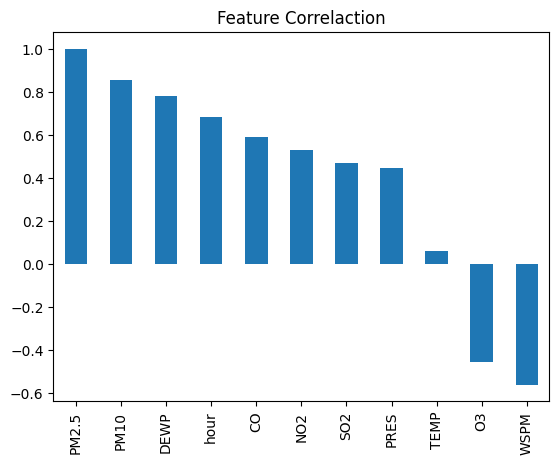

In [62]:
plt.title("Feature Correlaction")
air_quality.loc[(air_quality['datetime'] == '2013-03-01') & (air_quality['station'] == 'Aotizhongxin')].select_dtypes('number').corr()['PM2.5'].sort_values(ascending=False).dropna().plot(kind='bar')

plt.show()

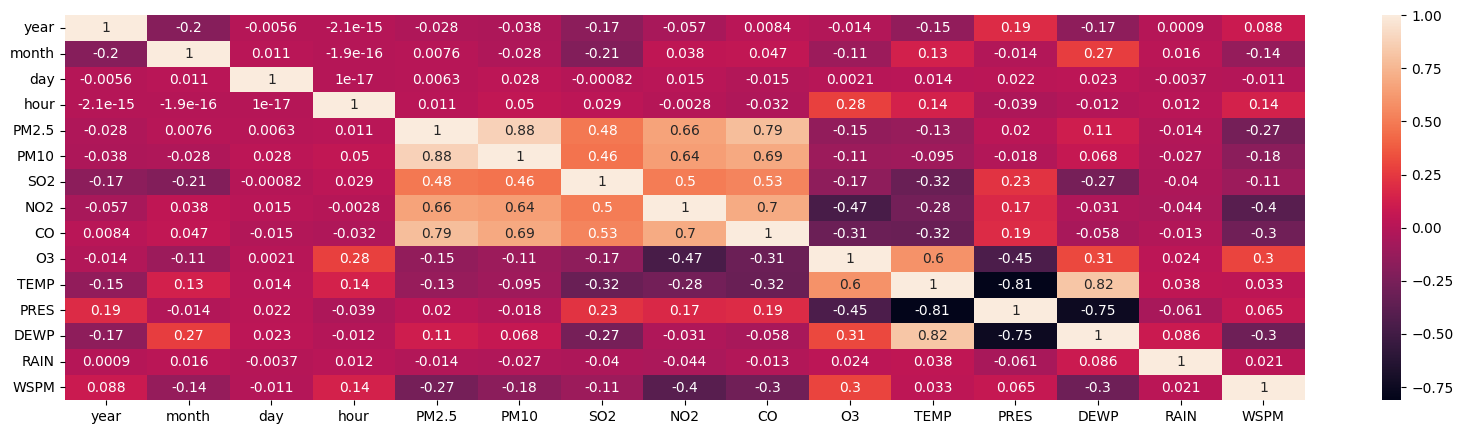

In [67]:

plt.figure(figsize=(20,5))
sns.heatmap(air_quality.select_dtypes('number').corr(),annot=True)
plt.show()

### Pertanyaan 2:

- Bagaimana pola polusi udara berubah dari waktu ke waktu di berbagai stasiun pengukuran? Apakah ada tren peningkatan atau penurunan polusi udara dari tahun ke tahun di stasiun-stasiun tersebut? Pertanyaan ini mengarah pada analisis pola dan tren dari data polusi udara dalam rentang waktu tertentu di berbagai stasiun pengukuran, yang dapat memberikan wawasan mengenai perkembangan polusi udara dan memberikan dasar bagi tindakan yang relevan dalam pengelolaan lingkungan.

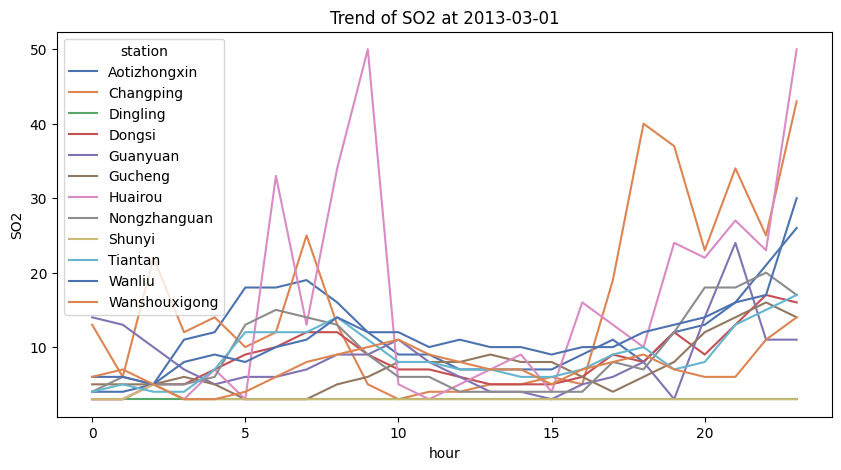

In [54]:
filtered_data = air_quality.loc[(air_quality['datetime'] =='2013-03-01')]

plt.figure(figsize=(10,5))
plt.title("Trend of SO2 at 2013-03-01")
sns.lineplot(y=filtered_data['SO2'],x=filtered_data['hour'],hue=filtered_data['station'],palette='deep')
plt.show()

<Axes: xlabel='station'>

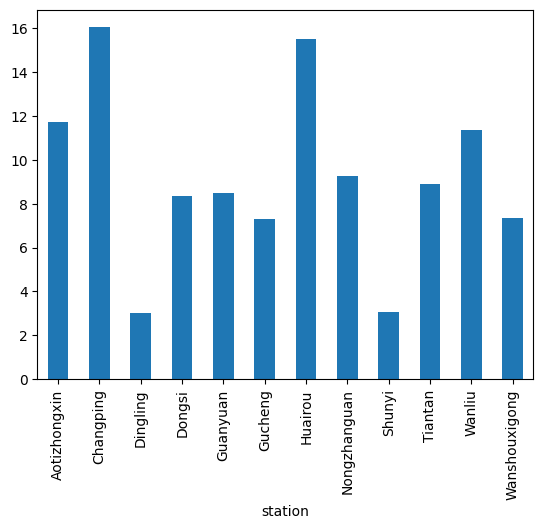

In [55]:
filtered_data.groupby('station')['SO2'].mean().plot(kind='bar')

<Axes: xlabel='station'>

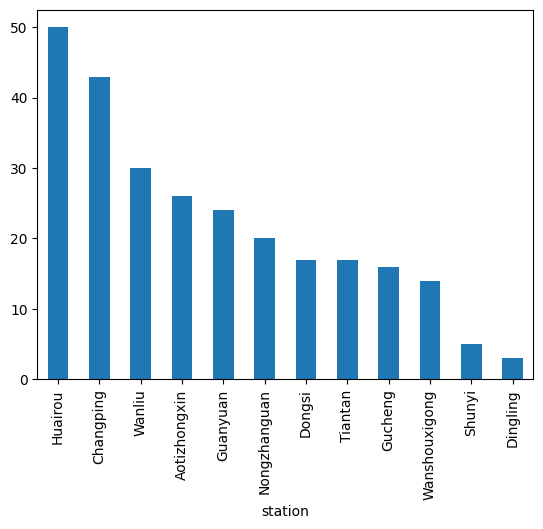

In [57]:
filtered_data.groupby('station')['SO2'].max().sort_values(ascending=False).plot(kind='bar')

## Conclusion

1. Analisis korelasi antara PM2.5 dan variabel lain dalam DataFrame air_quality menunjukkan beberapa temuan penting:

    - **Keterkaitan PM2.5 dengan Polusi Udara:**

        Korelasi positif yang signifikan dengan PM10 menunjukkan bahwa PM2.5 dan PM10 saling terkait erat. Hal ini menandakan bahwa sumber emisi dan faktor meteorologi yang sama mungkin berkontribusi pada peningkatan kedua jenis partikel ini.
        Hubungan dengan polutan gas: Korelasi positif dengan SO2, NO2, dan CO menunjukkan bahwa peningkatan emisi dari sumber seperti pembangkit listrik, industri, dan kendaraan bermotor dapat meningkatkan PM2.5 dan polutan gas secara bersamaan.
        Pengaruh Faktor Lain:

    - **Peran ozon:**

        Korelasi negatif dengan O3 menunjukkan bahwa ozon dapat membantu mengurangi PM2.5 di atmosfer. Hal ini mungkin terjadi karena ozon bereaksi dengan prekursor PM2.5, sehingga mengurangi pembentukannya.
        Dampak temperatur: Korelasi negatif dengan TEMP menunjukkan bahwa temperatur yang lebih tinggi dapat menurunkan tingkat PM2.5. Hal ini mungkin disebabkan oleh peningkatan dispersi dan penguapan partikel di udara yang lebih hangat.

    - **Kompleksitas Polusi Udara:**
    
        Kesimpulannya, analisis korelasi menunjukkan bahwa PM2.5 memiliki keterkaitan erat dengan polusi udara yang disebabkan oleh berbagai sumber dan faktor. Peningkatan emisi polutan dan kondisi meteorologi tertentu dapat meningkatkan PM2.5, sementara ozon dan temperatur yang lebih tinggi dapat membantu menguranginya.


2. Berdasarkan analisis data SO2 di Beijing pada tanggal 1 Maret 2013, dapat disimpulkan bahwa:

    - **Kadar SO2:**
        - Rata-rata kadar SO2 di semua stasiun **aman dalam kurun waktu 24 jam**, dengan nilai mean di bawah batas aman 20 µg/m³.
        - **Huairou memiliki nilai SO2 tertinggi** pada pukul 5-10 pagi, kemungkinan karena:
            * **Aktivitas industri**: Huairou memiliki beberapa kawasan industri yang beroperasi pada pagi hari.
            * **Peningkatan aktivitas manusia**: Aktivitas manusia seperti kendaraan bermotor dan pemanas ruangan dapat meningkatkan emisi SO2 pada pagi hari.
            * **Pusat perkumpulan manusia**: Huairou memiliki populasi yang lebih padat dibandingkan dengan stasiun lain, sehingga emisi SO2 dari aktivitas manusia lebih terkonsentrasi.

    - **Fluktuasi Kadar SO2:**
        * Kadar SO2 di semua stasiun **berfluktuasi sepanjang hari**, dengan pola yang konsisten:
            * Meningkat pada pagi dan sore hari.
            * Menurun pada siang hari.
        
    - **Kesimpulan:**

        Meskipun rata-rata kadar SO2 di Beijing pada tanggal 1 Maret 2013 aman dalam kurun waktu 24 jam, terdapat fluktuasi kadar SO2 yang signifikan. Peningkatan kadar SO2 di Huairou pada pagi hari perlu diwaspadai dan dikaji lebih lanjut. Upaya untuk mengurangi emisi SO2 dan meningkatkan kualitas udara di Beijing perlu dilakukan secara berkelanjutan.